## Data
Data for this project was dowloaded from Kaggle from the source below: 

https://www.kaggle.com/datasets/akemail/blue-bike-boston-ma-bike-sharing-dataset

Each row represents an hour of a day, from January 1st 2022 through May 31st 2024, and includes information about the number and duration of rides during that hour for members and non-members as well as the conditions of the day, like the day of the week, and weather conditions.   


## Goals of this Project

The goal of this project is to 
- Load and explore the dataset
- Clean and summarize the dataset so that it is useable for analysis
- Perform Exlporatory Data Analysis: develop questions and analyze the data to find answers 

## Loading and Previewing the Data

Notes on the data
- no null values
- Two categorical columns, the date_hour and weather condition, the rest are numerical
- ranges from 1/1/2020 midnight to 5/31/2024 midnight
- isweekend and isholiday are numeric, should change to binary type
- has date and hour combined into two columns, would be useful to deparate them so that we can perform analysis by date and hour of the day separately
- 5 different weather conditions, each with at least a few hundred observations

In [101]:
#import necessary libraries
#%matplotlib widget
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy.stats import zscore

In [103]:
bluebike_data = pd.read_csv("bluebike_data_by_hour.csv")

In [104]:
bluebike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21079 entries, 0 to 21078
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_hour              21079 non-null  object 
 1   casual_riders_count    21079 non-null  int64  
 2   member_riders_count    21079 non-null  int64  
 3   casual_rider_duration  21079 non-null  int64  
 4   member_rider_duration  21079 non-null  int64  
 5   count                  21079 non-null  int64  
 6   travel_time            21079 non-null  int64  
 7   day_of_week            21079 non-null  object 
 8   IsWeekend              21079 non-null  int64  
 9   IsHoliday              21079 non-null  int64  
 10  Temp(c)                21079 non-null  float64
 11  rel_humidity           21079 non-null  int64  
 12  wspd                   21079 non-null  float64
 13  pres                   21079 non-null  float64
 14  weather_condition      21079 non-null  object 
dtypes:

### Additional information about the columns : 
-__Date_hour__: date and hour of data in format MM/DD/YYYY HH:MM

-__casual_riders_count__: count of rides by non-members

-__member_riders_count__: count of rides by members

-__casual_rider_duration__: total time of rides by casual riders in the hour in seconds

-__member_rider_duration__: total time of rides by member riders in the hour in seconds

-__count__: total count of all trips during the hour

-__travel_time__: total travel time for all trips during the hour in seconds

-__day_of_week__: day of the week 

-__IsWeekend__: binary indicator of whether the day is a weekend (1 is yes, 0 is no)

-__IsHoliday__: binary indicator of whether the day is a holiday (1 is yes, 0 is no)

-__Temp(c)__: temperature in celsius during the hour

-__rel_humidity__: Relative humidity percentage during the hour

-__wspd__: wind speed in km/h during the hour

-__pres__: Atmospheric pressure in hectopascals during the hour

-__weather_condition__: weather condition during the hour  __ng)




In [108]:
bluebike_data.isnull().sum()

Date_hour                0
casual_riders_count      0
member_riders_count      0
casual_rider_duration    0
member_rider_duration    0
count                    0
travel_time              0
day_of_week              0
IsWeekend                0
IsHoliday                0
Temp(c)                  0
rel_humidity             0
wspd                     0
pres                     0
weather_condition        0
dtype: int64

In [110]:
print(bluebike_data.describe())

       casual_riders_count  member_riders_count  casual_rider_duration  \
count         21079.000000         21079.000000           2.107900e+04   
mean            106.744106           315.014137           4.110391e+05   
std             127.927135           311.070313           8.341194e+05   
min               0.000000             0.000000           0.000000e+00   
25%              15.000000            61.000000           2.064600e+04   
50%              57.000000           239.000000           1.024180e+05   
75%             151.000000           464.000000           3.930615e+05   
max             914.000000          2434.000000           1.852849e+07   

       member_rider_duration         count   travel_time     IsWeekend  \
count           2.107900e+04  21079.000000  2.107900e+04  21079.000000   
mean            3.111644e+05    421.758243  7.222035e+05      0.284786   
std             4.320148e+05    410.429980  1.062146e+06      0.451323   
min             0.000000e+00      1.0

In [112]:
print(bluebike_data["weather_condition"].value_counts())

weather_condition
Cloudy    10164
Fair       6800
Rain       2414
Clear      1282
Snow        419
Name: count, dtype: int64


## Cleaning the Data

Split date_time column into date, time, hour, month, and year. Remove 2024 data, since we only have 5 months of data. Change IsWeekend and IsHoliday to binary.  

Look for and remove outliers in Rider Count, Travel Time, Wind Speed, and Temperature

In [116]:

bluebike_data["Date"] = bluebike_data.apply(lambda row: row["Date_hour"].split(" ")[0], axis = 1)
bluebike_data["Hour"] = bluebike_data.apply(lambda row: row["Date_hour"].split(" ")[1], axis = 1)
bluebike_data["Hour"] = bluebike_data.apply(lambda row: row["Hour"].split(":")[0], axis = 1).astype(int)
bluebike_data["Month"] = bluebike_data.apply(lambda row: row["Date_hour"].split("/")[0], axis = 1).astype(int)
bluebike_data["Year"] = bluebike_data.apply(lambda row: row["Date"].split("/")[2], axis = 1)
bluebike_data = bluebike_data[bluebike_data["Year"] != "2024"]


bluebike_data["IsWeekend"] = bluebike_data["IsWeekend"].map({1: True, 0: False})
bluebike_data["IsHoliday"] = bluebike_data["IsHoliday"].map({1: True, 0: False})

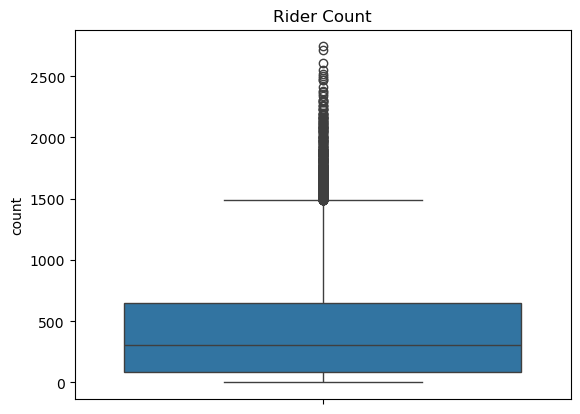

In [117]:
 %matplotlib inline
plt.figure()
sns.boxplot(bluebike_data["count"])
plt.title("Rider Count")
plt.show()


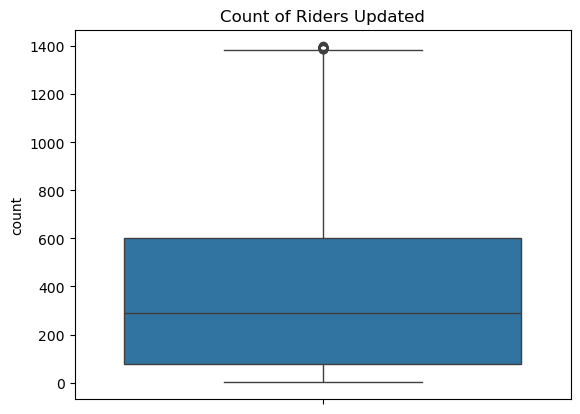

In [119]:
bluebike_data = bluebike_data[bluebike_data["count"]<1400]
plt.figure()
sns.boxplot(bluebike_data["count"])
plt.title("Count of Riders Updated")
plt.show()

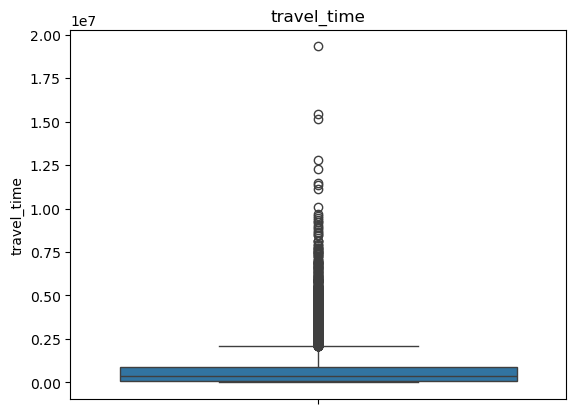

In [122]:
plt.figure()
sns.boxplot(bluebike_data["travel_time"])
plt.title("travel_time")
plt.show()

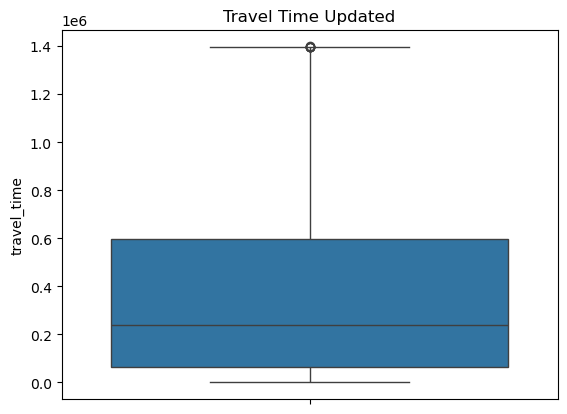

In [126]:
bluebike_data = bluebike_data[bluebike_data["travel_time"]<1400000]
plt.figure()
sns.boxplot(bluebike_data["travel_time"])
plt.title("Travel Time Updated")
plt.show()

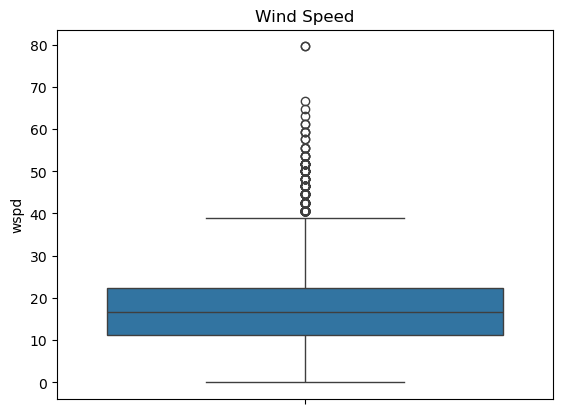

In [18]:
plt.figure()
sns.boxplot(bluebike_data["wspd"])
plt.title("Wind Speed")
plt.show()

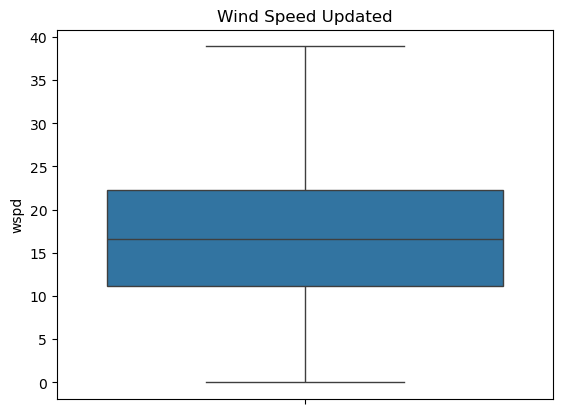

In [19]:
plt.figure()
bluebike_data = bluebike_data[bluebike_data["wspd"]<40]
sns.boxplot(bluebike_data["wspd"])
plt.title("Wind Speed Updated")
plt.show()

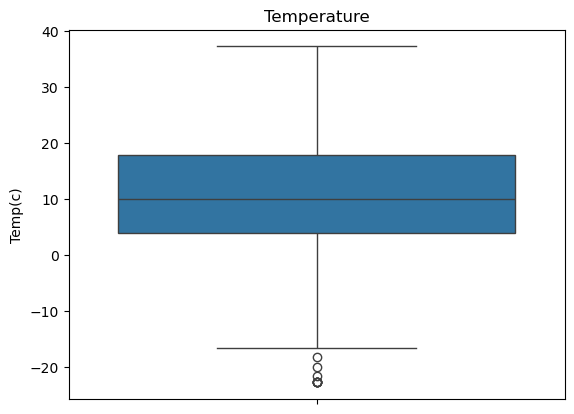

In [20]:
plt.figure()
sns.boxplot(bluebike_data["Temp(c)"])
plt.title("Temperature")
plt.show()

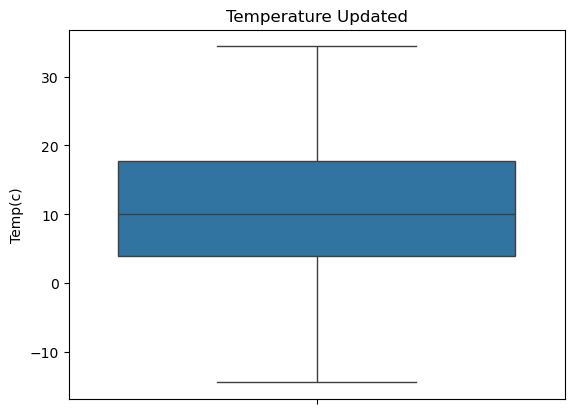

In [21]:
bluebike_data = bluebike_data[bluebike_data["Temp(c)"]>-15]
bluebike_data = bluebike_data[bluebike_data["Temp(c)"]<35]
plt.figure()
sns.boxplot(bluebike_data["Temp(c)"])
plt.title("Temperature Updated")
plt.show()

C:\Users\kvella\AppData\Local\Temp\ipykernel_37256\45824024.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  bluebike_data.hist(ax=ax)


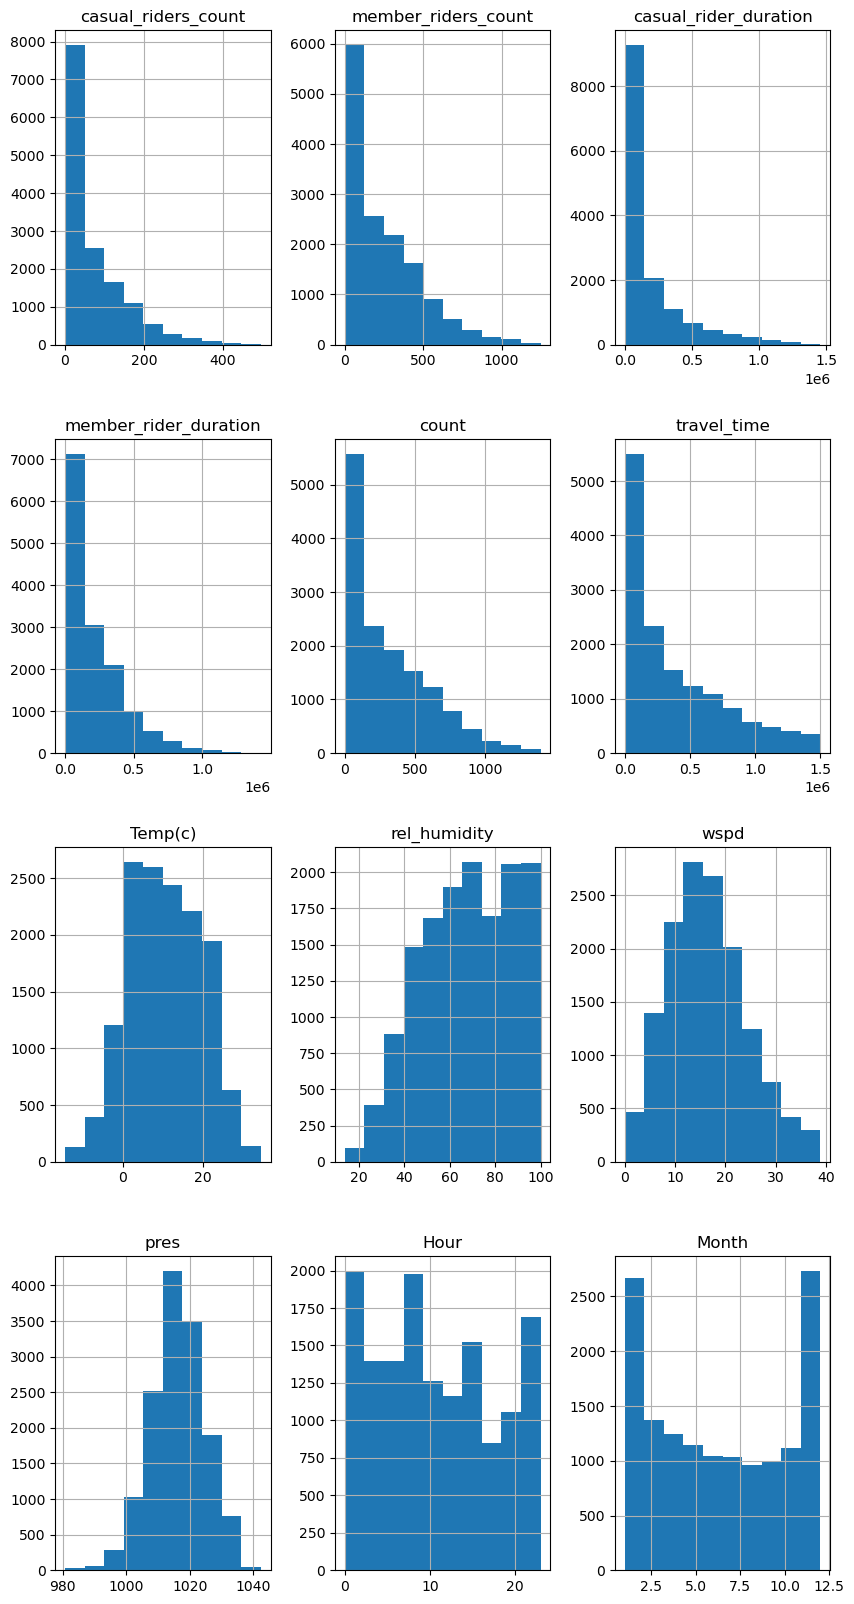

In [22]:
fig = plt.figure(figsize = (10, 20))
ax = fig.gca()
bluebike_data.hist(ax=ax)
plt.show()

In [23]:
print(bluebike_data.columns)


Index(['Date_hour', 'casual_riders_count', 'member_riders_count',
       'casual_rider_duration', 'member_rider_duration', 'count',
       'travel_time', 'day_of_week', 'IsWeekend', 'IsHoliday', 'Temp(c)',
       'rel_humidity', 'wspd', 'pres', 'weather_condition', 'Date', 'Hour',
       'Month', 'Year'],
      dtype='object')


In [24]:
# NORMALIZING DATA
columns_to_drop = ["Date_hour", "casual_riders_count", "member_riders_count", "casual_rider_duration", "member_rider_duration", 
                   "day_of_week", "weather_condition", "Date"]


bluebike_numeric = bluebike_data.drop(columns = columns_to_drop)
bluebike_numeric_normalized = bluebike_numeric.copy()
bluebike_numeric_normalized["IsWeekend"] = bluebike_numeric_normalized["IsWeekend"].map({True: 1, False: -1})
bluebike_numeric_normalized["IsHoliday"] = bluebike_numeric_normalized["IsHoliday"].map({True: 1, False: -1})
bluebike_numeric_normalized[[ "Temp(c)", "rel_humidity", "wspd", "Hour", "Month"]]= bluebike_numeric[[ "Temp(c)", "rel_humidity", "wspd","Hour", "Month"]].apply(zscore)
bluebike_numeric_normalized["count"]=bluebike_numeric_normalized["count"]**(1/3)
bluebike_numeric_normalized["travel_time"]=bluebike_numeric_normalized["travel_time"]**(1/3)

C:\Users\kvella\AppData\Local\Temp\ipykernel_37256\2618858400.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  bluebike_numeric_normalized.hist(ax=ax2)


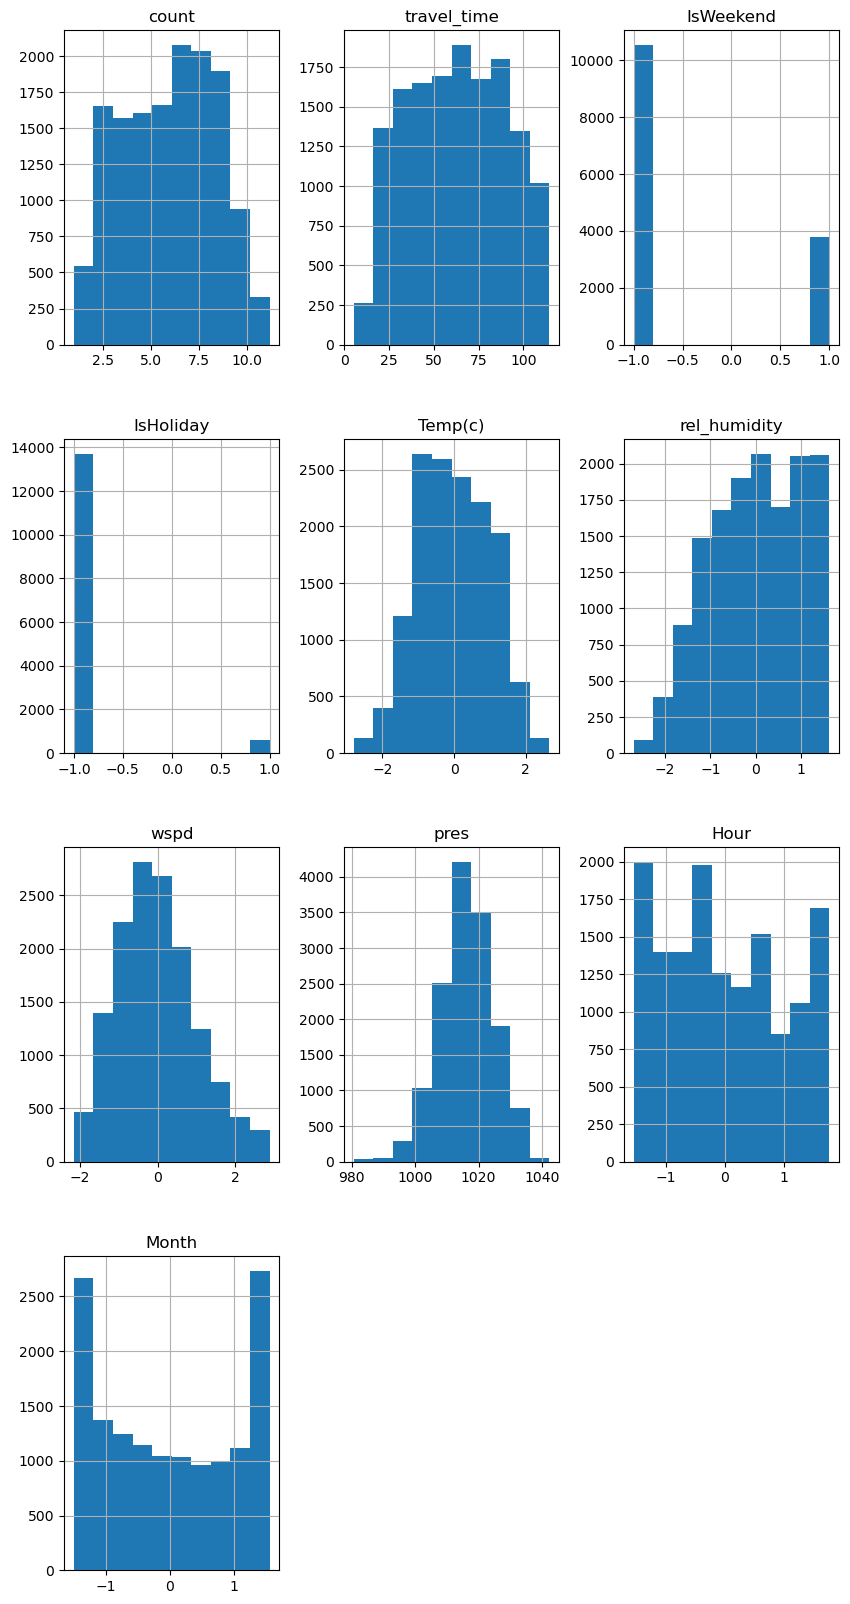

In [25]:
fig2 = plt.figure(figsize = (10, 20))
ax2 = fig2.gca()
bluebike_numeric_normalized.hist(ax=ax2)
plt.show()


## Identifying Correlations

When focusing in on travel time and count of riders, we can see in the heat map that the only numeric variables that show a high correlation are Temperature and Hour of the day. Although I would have thought that there would be some correlation between type of day (Workday/weekend/holiday) and rides, when I explore those variables it turns out that there are a similar amount of riders on the different day types. 

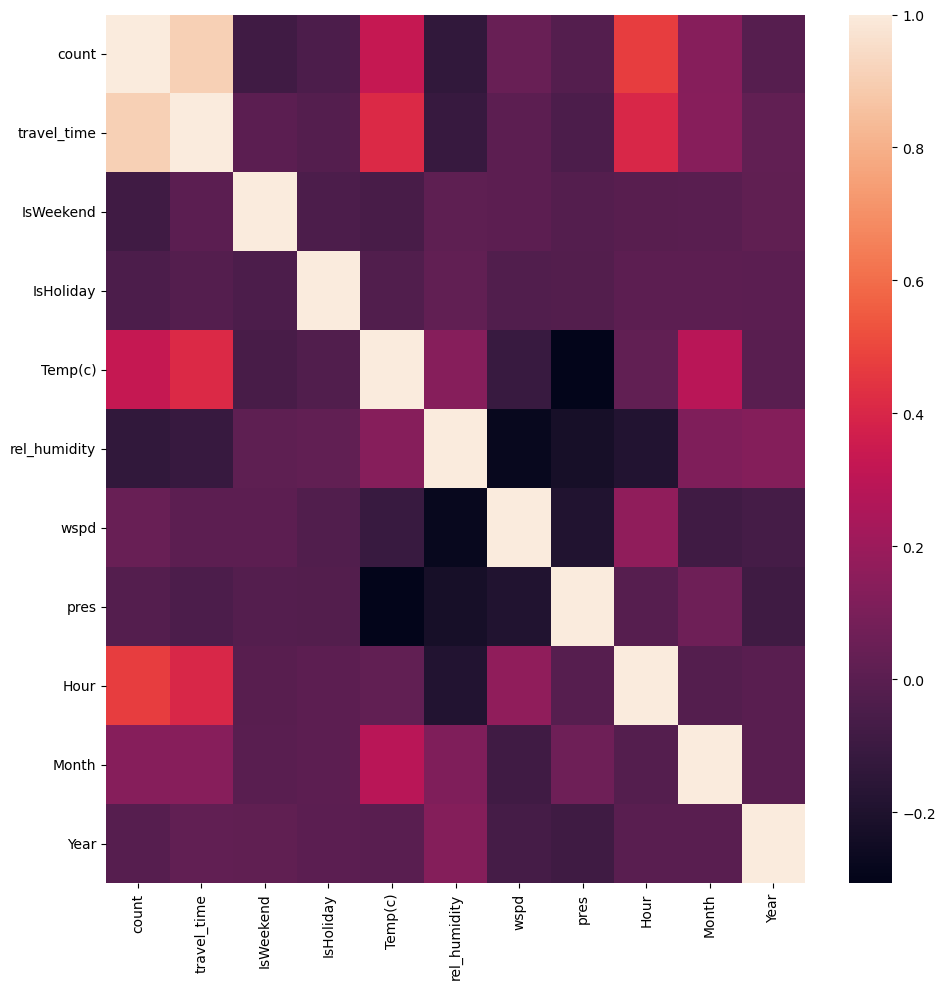

In [27]:
plt.figure(figsize = (10, 10))
sns.heatmap(data = bluebike_numeric_normalized.corr(), annot = False)
plt.tight_layout()
plt.show()

## Exploring Correlations

According to the heat map above, the numerical variables that have the strongest correlation with rider count and travel time are Temperature and Hour of the Day. Month also has a weaker correlation. We can also explore travel time's correlation with weather, the one categorical variable, which is not explored above. 

**Temperatures** :
peak of riders between 10 and 30C

**Hours** :
Peak of rider minutes between noon and 8pm (hrs 12-20), max and 4pm and min at 5am

**Month**: 
Most rider minutes in April - October, peaking in July & August

**Weekends and Holidays** :
no big difference between workday, weekend, or holiday rides. On weekends and holidays the data is slightly more skewed towards shorter rides. 

**Weather**: There is a lot of overlap in the boxplots, but by looking at the means, we can see there is most minutes ridden when the weather is cloudy and fair, and the least ridden during snow. 

### Looking at Temperature


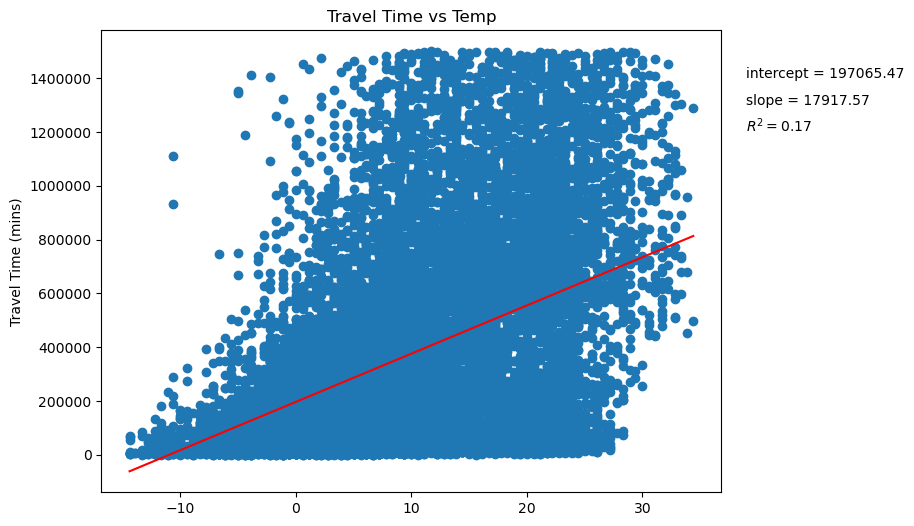

In [30]:
from sklearn.linear_model import LinearRegression

#fit linear regression model to data
x= bluebike_data["Temp(c)"]
x = np.array(x).reshape((-1, 1))
y = bluebike_data["travel_time"]
model = LinearRegression()
model.fit(x, y)

#calculate r2, coefficient and intercept 
r2= model.score(x, y)
coefficients = model.coef_
intercept = model.intercept_


fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(bluebike_data["Temp(c)"], bluebike_data["travel_time"])

#setup data for plotting trend line
num = len(bluebike_data)
start = bluebike_data["Temp(c)"].min()
end =  bluebike_data["Temp(c)"].max()
xseq = np.linspace(start, end, num = num)
ax.plot(xseq, intercept+coefficients[0]*xseq, color="red")

plt.ylabel("Travel Time (mins)")
plt.ticklabel_format( style = 'plain', axis = 'y')
plt.title("Travel Time vs Temp")

#annotate intercept, slope and r2
beta0 = r'intercept = '+str(round(intercept, 2))
ax.text(39, 1400000, beta0, fontsize = 10)
beta1 = r'slope = '+str(round(coefficients[0], 2))
ax.text(39, 1300000, beta1, fontsize = 10)
r_squared = r"$R ^2 = $" + str(round(r2, 2))
ax.text(39, 1200000, r_squared, fontsize = 10)

plt.show()

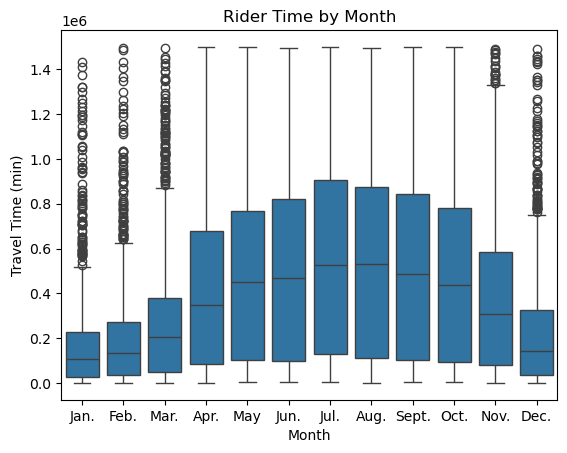

In [82]:
fig, ax = plt.subplots()
sns.boxplot(data = bluebike_data, x="Month", y="travel_time")
ax.set_xticks(list(range( 12)))
ax.set_xticklabels(["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."])
plt.ylabel("Travel Time (min)")
plt.title("Rider Time by Month")
plt.show()

### Rides at Different Hours of the Day

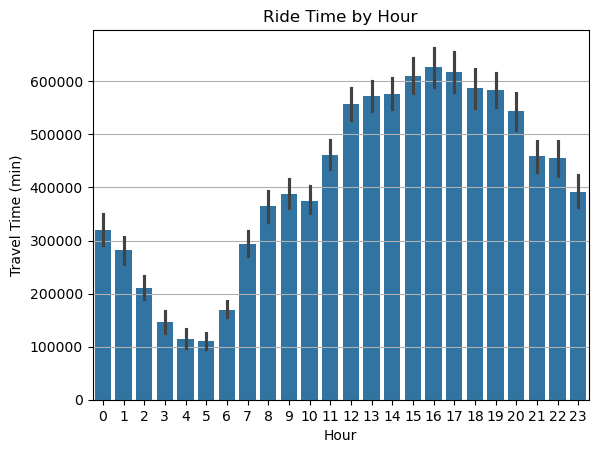

In [84]:
plt.figure()
sns.barplot(y=bluebike_data["travel_time"], x=bluebike_data["Hour"])
plt.ylabel("Travel Time (min)")
plt.ticklabel_format( style = 'plain', axis = 'y')
plt.title("Ride Time by Hour")
plt.grid(axis = "y")
plt.show()

### Holiday and Weekend Rides vs Weekday Rides

In [39]:
workday = bluebike_data[bluebike_data["IsWeekend"]== False]
workday = workday[workday["IsHoliday"]==False]
weekend = bluebike_data[bluebike_data["IsWeekend"]==True]
holiday = bluebike_data[bluebike_data["IsHoliday"]== True]

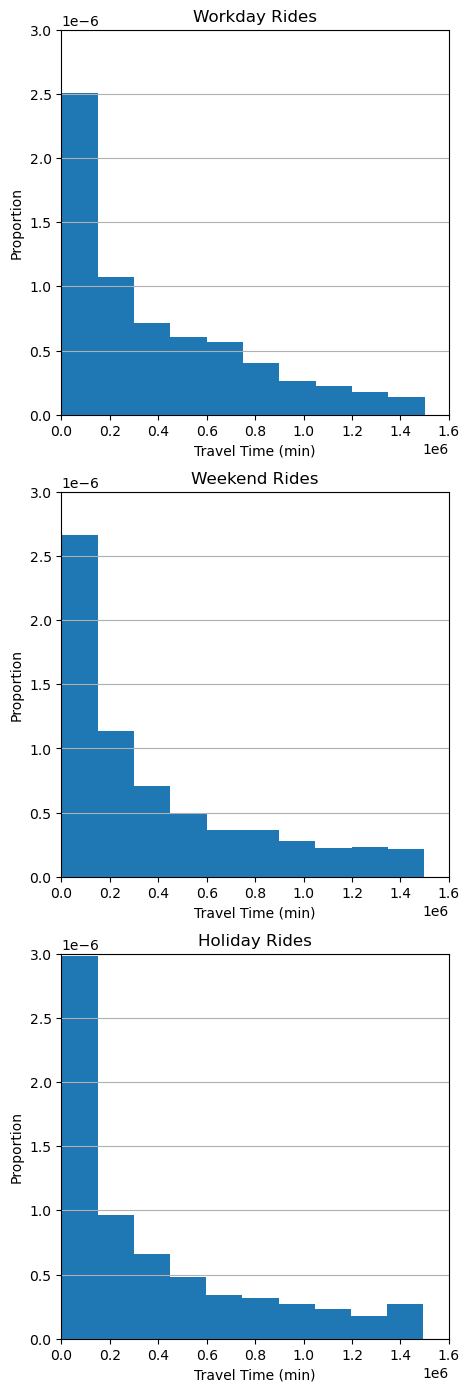

In [41]:
fig, ax = plt.subplots(3, figsize = (5, 17))
ax[0].hist(workday["travel_time"], density = True)
ax[0].set_title("Workday Rides")
ax[0].set_xlabel("Travel Time (min)")
ax[0].set_ylabel("Proportion")
ax[0].set_ylim([0, .000003])
ax[0].set_xlim([0, 1600000])
ax[0].grid(axis = "y")
ax[1].set_xlabel("Travel Time (min)")
ax[1].set_ylabel("Proportion")
ax[1].hist(weekend["travel_time"], density = True)
ax[1].set_title("Weekend Rides")
ax[1].set_ylim([0, .000003])
ax[1].set_xlim([0, 1600000])
ax[1].grid(axis = "y")
ax[2].hist(holiday["travel_time"], density = True)
ax[2].set_xlabel("Travel Time (min)")
ax[2].set_ylabel("Proportion")
ax[2].set_title("Holiday Rides")
ax[2].set_ylim([0, .000003])
ax[2].set_xlim([0, 1600000])
ax[2].grid(axis = "y")

### Rides and Weather



In [43]:
weather_counts = bluebike_data["weather_condition"].value_counts().reset_index()
print(weather_counts)

  weather_condition  count
0            Cloudy   6684
1              Fair   4694
2              Rain   1617
3             Clear   1015
4              Snow    310


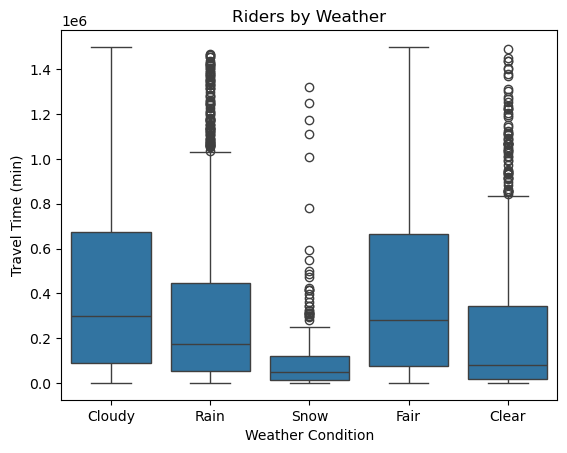

In [45]:
sns.boxplot(data = bluebike_data, x = "weather_condition", y = "travel_time")
plt.xlabel("Weather Condition")
plt.ylabel("Travel Time (min)")
plt.title("Riders by Weather")
plt.show()